In [9]:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata
from passwords import *

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.ny.gov", API_TOKEN)

# Define the query parameters
station_complex = '8 St-NYU (R,W)'
start_date = '2024-04-01'
end_date = '2024-06-30'

# Query to filter data for the specified station and date range
query = f"station_complex='{station_complex}' AND transit_timestamp >= '{start_date}' AND transit_timestamp <= '{end_date}'"

# Fetch the filtered data with a limit of 50,000
results = client.get("wujg-7c2s", where=query, limit=50000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

# Convert the transit_timestamp to datetime
results_df['transit_timestamp'] = pd.to_datetime(results_df['transit_timestamp'])

# Sort the DataFrame by transit_timestamp
results_df = results_df.sort_values(by='transit_timestamp')

# Add a new column for the row number
results_df['row_number'] = range(1, len(results_df) + 1)

# Convert ridership to numeric (in case it's not)
results_df['ridership'] = pd.to_numeric(results_df['ridership'], errors='coerce')

# Sum the ridership
total_ridership = results_df['ridership'].sum()

# Count the number of occurrences
occurrences_count = results_df.shape[0]

print(f"Number of occurrences from April to the end of June: {occurrences_count}")
print(f"Total ridership from April to the end of June: {total_ridership}")

# Display the table of all occurrences starting from 2024-04-01
# Using pandas to display the DataFrame nicely
results_df

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

In [10]:
def get_total_ridership(station_complex, start_date, end_date, limit = 50000) :
    """
    Fetch total ridership for a given station and date range.
    
    Parameters:
        station_complex (str): The station complex to query.
        start_date (str): The start date for the query (YYYY-MM-DD).
        end_date (str): The end date for the query (YYYY-MM-DD).
        limit (int): The maximum number of records to fetch (default is 50000).
        
    Returns:
        float: The total ridership.
    """
    # Unauthenticated client only works with public datasets
    client = Socrata("data.ny.gov", API_TOKEN)

    # Query to filter data for the specified station and date range
    query = f"station_complex='{station_complex}' AND transit_timestamp >= '{start_date}' AND transit_timestamp <= '{end_date}'"

    # Fetch the filtered data
    results = client.get("wujg-7c2s", where=query, limit=limit)

    # Convert to pandas DataFrame
    results_df = pd.DataFrame.from_records(results)

    # Convert the transit_timestamp to datetime
    results_df['transit_timestamp'] = pd.to_datetime(results_df['transit_timestamp'])

    # Convert ridership to numeric (in case it's not)
    results_df['ridership'] = pd.to_numeric(results_df['ridership'], errors='coerce')

    # Return the sum of the ridership column
    return results_df['ridership'].sum()


# Example usage
station = '8 St-NYU (R,W)'
start = '2024-04-01'
end = '2024-06-30'

#total_ridership = get_total_ridership(station, start, end)
#print(f"Total ridership from {start} to {end} at {station}: {total_ridership}")



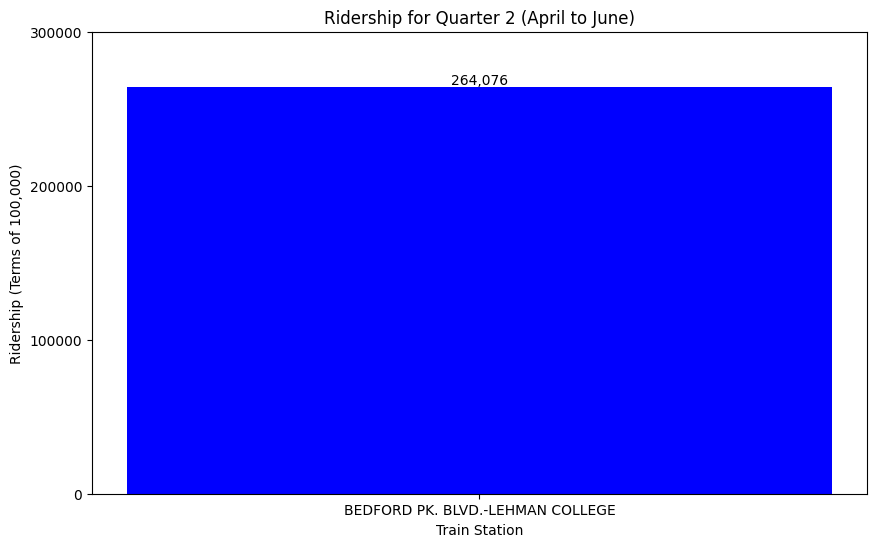

In [14]:
# Make a function to graph
import matplotlib.pyplot as plt

import numpy as np

def plotGraph(title, xlable, ylable, stations, ridership, iterations):
    """
    Plots a bar graph for ridership data.

    Parameters:
    stations (list): List of station names.
    ridership (list): List of ridership numbers corresponding to the stations.
    """
    # Create bar graph
    plt.figure(figsize=(10, 6))
    bars = plt.bar(stations, ridership, color=['blue', 'green'])

    # Add title and labels
    plt.title(title)
    plt.xlabel(xlable)
    plt.ylabel(ylable)

    # Set Y-axis ticks to count every 500000, etc., depending on iterations
    plt.yticks(np.arange(0, max(ridership) + iterations, iterations))

    # Add exact number of riders at the top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,}', ha='center', va='bottom')

    # Show the plot
    plt.show() 

# Example usage
title = 'Ridership for Quarter 2 (April to June)'
xLable = 'Train Station'
yLable = "Ridership (Terms of 100,000)"
stations = ['BEDFORD PK. BLVD.-LEHMAN COLLEGE']
ridership = [264076]
iterations = 100000
plotGraph(title, xLable, yLable, stations, ridership, iterations)

In [15]:


# private college
private_college = ["8 St-NYU (R,W)", "116 St-Columbia University (1)"]

# Public College List 
public_college = ["Bedford Park Blvd-Lehman College (4)", "President St-Medgar Evers College (2,5)"]


# Get total public college 
public_college_ridership = []

private_college_ridership = []

start = '2023-01-01'
end = '2023-12-31'


"""ridership = get_total_ridership("8 St-NYU (R,W)", start, end, 50000)
private_college_ridership.append(ridership)"""

#ridership = get_total_ridership("116 St-Columbia University (1)", start, end, 50000)
#private_college_ridership.append(ridership)

"""for station in private_college:
    ridership = get_total_ridership(station, start, end, 200000)
    private_college_ridership.append(ridership)

for stations in public_college:
    ridershipPublic = get_total_ridership(stations, start, end, 200000)
    public_college_ridership.append(ridershipPublic) """   





private_college_ridership= [3769795.0, 3406453.0]

public_college_ridership = [1196755.0, 749514.0]

print(private_college)
print(private_college_ridership)
print(public_college)
print(public_college_ridership)  

# Turn to dictionary for easy visuals

# Private college dictionary
private_college_dict = dict(zip(private_college, private_college_ridership))

# Public college dictionary
public_college_dict = dict(zip(public_college, public_college_ridership))

print(private_college_dict)
print(public_college_dict)





['8 St-NYU (R,W)', '116 St-Columbia University (1)']
[3769795.0, 3406453.0]
['Bedford Park Blvd-Lehman College (4)', 'President St-Medgar Evers College (2,5)']
[1196755.0, 749514.0]
{'8 St-NYU (R,W)': 3769795.0, '116 St-Columbia University (1)': 3406453.0}
{'Bedford Park Blvd-Lehman College (4)': 1196755.0, 'President St-Medgar Evers College (2,5)': 749514.0}


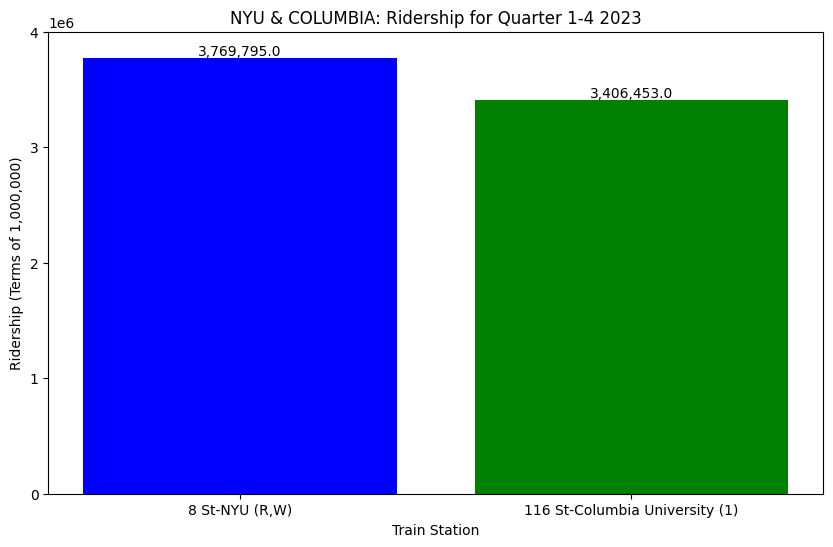

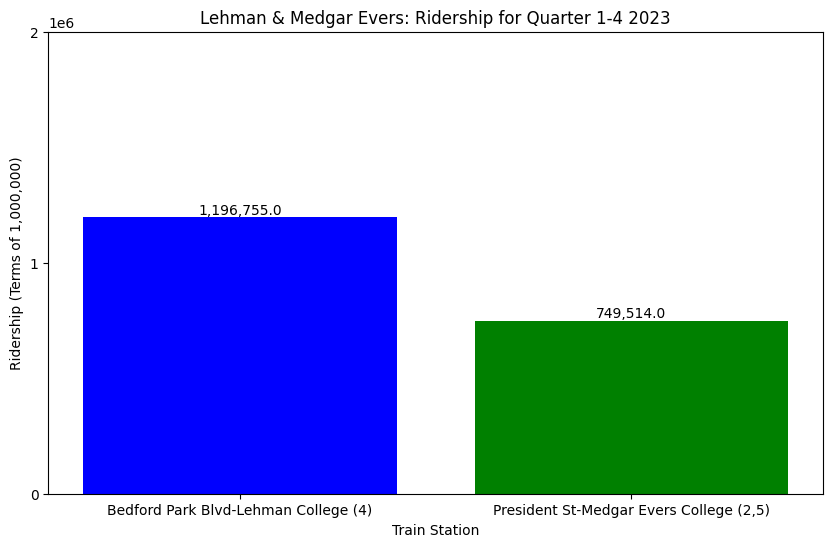

In [18]:
# graph the data 

# Private data
title = 'NYU & COLUMBIA: Ridership for Quarter 1-4 2023'
xLable = 'Train Station'
yLable = "Ridership (Terms of 1,000,000)"
stations = private_college
ridership = private_college_ridership
iterations = 1000000
plotGraph(title, xLable, yLable, stations, ridership, iterations)


# Public data
title = 'Lehman & Medgar Evers: Ridership for Quarter 1-4 2023'
xLable = 'Train Station'
yLable = "Ridership (Terms of 1,000,000)"
stations = public_college
ridership = public_college_ridership
iterations = 1000000
plotGraph(title, xLable, yLable, stations, ridership, iterations)